C:\Users\prajv\AppData\Local\Temp\ipykernel_5448\734370782.py:411: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis')
C:\Users\prajv\AppData\Local\Temp\ipykernel_5448\734370782.py:363: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis')
C:\Users\prajv\AppData\Local\Temp\ipykernel_5448\734370782.py:363: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis')
Animation size has reached 5291832 bytes, exceeding 

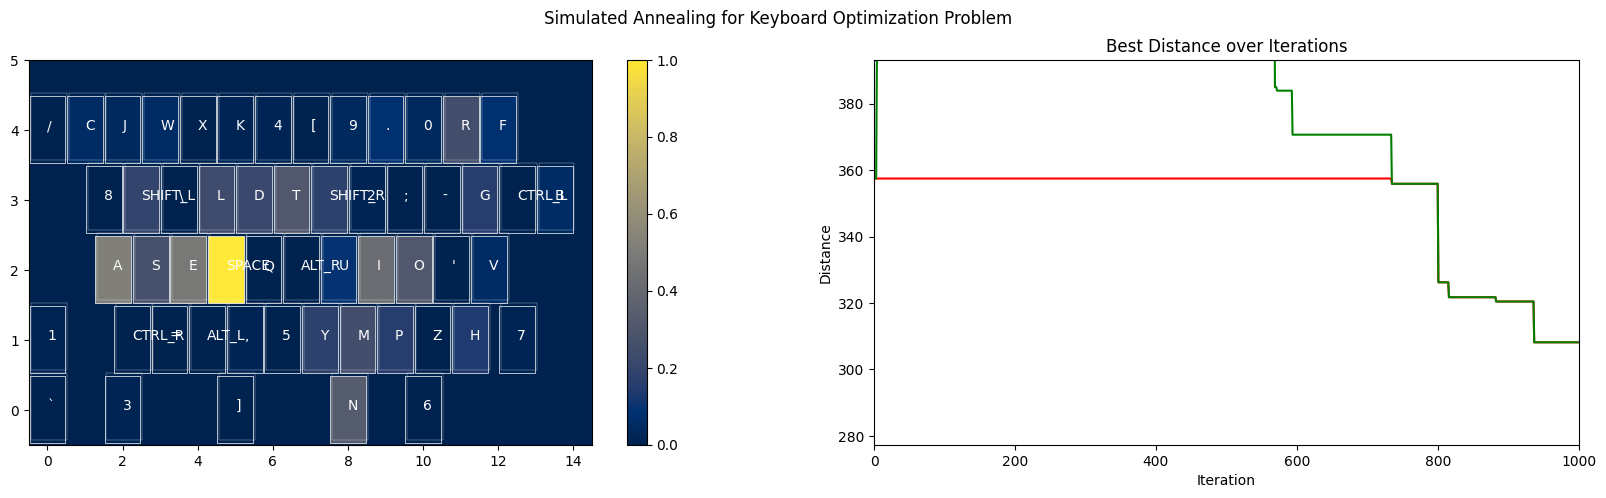

In [2]:
###
# Created By Prajwal Vijay (EE23B057)
# Just run this cell in the Jupyter Notebook, and give the required inputs
# The result will be an animation and a graph that shows how the process of finding optimal keyboard proceeds.
###


# Importing all required files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
import math
import random
import copy
from matplotlib import cm
# Keeps a track of the number of presses
keys = {}

# The dictionary of all possible characters in the input string
characters = {
    # Lowercase letters (unchanged)
    'a': ('a',), 'b': ('b',), 'c': ('c',), 'd': ('d',), 'e': ('e',),
    'f': ('f',), 'g': ('g',), 'h': ('h',), 'i': ('i',), 'j': ('j',),
    'k': ('k',), 'l': ('l',), 'm': ('m',), 'n': ('n',), 'o': ('o',),
    'p': ('p',), 'q': ('q',), 'r': ('r',), 's': ('s',), 't': ('t',),
    'u': ('u',), 'v': ('v',), 'w': ('w',), 'x': ('x',), 'y': ('y',),
    'z': ('z',),
    
    # Uppercase letters (updated)
    'A': ('Shift_R', 'a'), 'B': ('Shift_R', 'b'), 'C': ('Shift_R', 'c'),
    'D': ('Shift_R', 'd'), 'E': ('Shift_R', 'e'), 'F': ('Shift_R', 'f'),
    'G': ('Shift_R', 'g'), 'H': ('Shift_L', 'h'), 'I': ('Shift_L', 'i'),
    'J': ('Shift_L', 'j'), 'K': ('Shift_L', 'k'), 'L': ('Shift_L', 'l'),
    'M': ('Shift_L', 'm'), 'N': ('Shift_L', 'n'), 'O': ('Shift_L', 'o'),
    'P': ('Shift_L', 'p'), 'Q': ('Shift_R', 'q'), 'R': ('Shift_R', 'r'),
    'S': ('Shift_R', 's'), 'T': ('Shift_R', 't'), 'U': ('Shift_L', 'u'),
    'V': ('Shift_R', 'v'), 'W': ('Shift_R', 'w'), 'X': ('Shift_R', 'x'),
    'Y': ('Shift_L', 'y'), 'Z': ('Shift_R', 'z'),
    
    # Numbers and their shifted symbols (updated)
    '1': ('1',), '!': ('Shift_R', '1'),
    '2': ('2',), '@': ('Shift_R', '2'),
    '3': ('3',), '#': ('Shift_R', '3'),
    '4': ('4',), '$': ('Shift_R', '4'),
    '5': ('5',), '%': ('Shift_R', '5'),
    '6': ('6',), '^': ('Shift_L', '6'),
    '7': ('7',), '&': ('Shift_L', '7'),
    '8': ('8',), '*': ('Shift_L', '8'),
    '9': ('9',), '(': ('Shift_L', '9'),
    '0': ('0',), ')': ('Shift_L', '0'),
    
    # Other symbols (updated)
    '`': ('`',), '~': ('Shift_R', '`'),
    '-': ('-',), '_': ('Shift_L', '-'),
    '=': ('=',), '+': ('Shift_L', '='),
    '[': ('[',), '{': ('Shift_L', '['),
    ']': (']',), '}': ('Shift_L', ']'),
    '\\': ('\\',), '|': ('Shift_L', '\\'),
    ';': (';',), ':': ('Shift_L', ';'),
    "'": ("'",), '"': ('Shift_L', "'"),
    ',': (',',), '<': ('Shift_L', ','),
    '.': ('.',), '>': ('Shift_L', '.'),
    '/': ('/',), '?': ('Shift_L', '/'),
    
    # Space (unchanged)
    ' ': ('Space',),
}

# QWERTY Layout
QWERTY_LAYOUT = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 's'},
    '4': {'pos': (4, 4), 'start': 'd'},
    '5': {'pos': (5, 4), 'start': 'f'},
    '6': {'pos': (6, 4), 'start': 'j'},
    '7': {'pos': (7, 4), 'start': 'j'},
    '8': {'pos': (8, 4), 'start': 'k'},
    '9': {'pos': (9, 4), 'start': 'l'},
    '0': {'pos': (10, 4), 'start': ';'},
    '-': {'pos': (11, 4), 'start': ';'},
    '=': {'pos': (12, 4), 'start': ';'},
    
    # Top letter row
    'q': {'pos': (1.5, 3), 'start': 'a'},
    'w': {'pos': (2.5, 3), 'start': 's'},
    'e': {'pos': (3.5, 3), 'start': 'd'},
    'r': {'pos': (4.5, 3), 'start': 'f'},
    't': {'pos': (5.5, 3), 'start': 'f'},
    'y': {'pos': (6.5, 3), 'start': 'j'},
    'u': {'pos': (7.5, 3), 'start': 'j'},
    'i': {'pos': (8.5, 3), 'start': 'k'},
    'o': {'pos': (9.5, 3), 'start': 'l'},
    'p': {'pos': (10.5, 3), 'start': ';'},
    '[': {'pos': (11.5, 3), 'start': ';'},
    ']': {'pos': (12.5, 3), 'start': ';'},
    '\\': {'pos': (13.5, 3), 'start': ';'},
    
    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    's': {'pos': (2.75, 2), 'start': 's'},
    'd': {'pos': (3.75, 2), 'start': 'd'},
    'f': {'pos': (4.75, 2), 'start': 'f'},
    'g': {'pos': (5.75, 2), 'start': 'f'},
    'h': {'pos': (6.75, 2), 'start': 'j'},
    'j': {'pos': (7.75, 2), 'start': 'j'},
    'k': {'pos': (8.75, 2), 'start': 'k'},
    'l': {'pos': (9.75, 2), 'start': 'l'},
    ';': {'pos': (10.75, 2), 'start': ';'},
    "'": {'pos': (11.75, 2), 'start': ';'},
    
    # Bottom letter row
    'z': {'pos': (2.25, 1), 'start': 'a'},
    'x': {'pos': (3.25, 1), 'start': 's'},
    'c': {'pos': (4.25, 1), 'start': 'd'},
    'v': {'pos': (5.25, 1), 'start': 'f'},
    'b': {'pos': (6.25, 1), 'start': 'f'},
    'n': {'pos': (7.25, 1), 'start': 'j'},
    'm': {'pos': (8.25, 1), 'start': 'j'},
    ',': {'pos': (9.25, 1), 'start': 'k'},
    '.': {'pos': (10.25, 1), 'start': 'l'},
    '/': {'pos': (11.25, 1), 'start': ';'},
    
    # Special keys
    'Shift_L': {'pos': (0, 1), 'start': 'a'},
    'Shift_R': {'pos': (12.5, 1), 'start': ';'},
    'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
    'Alt_L': {'pos': (2, 0), 'start': 'a'},
    'Space': {'pos': (5, 0), 'start': 'f'},
    'Alt_R': {'pos': (8, 0), 'start': 'j'},
    'Ctrl_R': {'pos': (10, 0), 'start': ';'},
}

# DVORAK LAYOUT
DVORAK_LAYOUT = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 'o'},
    '4': {'pos': (4, 4), 'start': 'e'},
    '5': {'pos': (5, 4), 'start': 'u'},
    '6': {'pos': (6, 4), 'start': 'h'},
    '7': {'pos': (7, 4), 'start': 'h'},
    '8': {'pos': (8, 4), 'start': 't'},
    '9': {'pos': (9, 4), 'start': 'n'},
    '0': {'pos': (10, 4), 'start': 's'},
    '[': {'pos': (11, 4), 'start': 's'},
    ']': {'pos': (12, 4), 'start': 's'},
    
    # Top letter row
    '\'': {'pos': (1.5, 3), 'start': 'a'},
    ',': {'pos': (2.5, 3), 'start': 'o'},
    '.': {'pos': (3.5, 3), 'start': 'e'},
    'p': {'pos': (4.5, 3), 'start': 'u'},
    'y': {'pos': (5.5, 3), 'start': 'u'},
    'f': {'pos': (6.5, 3), 'start': 'h'},
    'g': {'pos': (7.5, 3), 'start': 'h'},
    'c': {'pos': (8.5, 3), 'start': 't'},
    'r': {'pos': (9.5, 3), 'start': 'n'},
    'l': {'pos': (10.5, 3), 'start': 's'},
    '/': {'pos': (11.5, 3), 'start': 's'},
    '=': {'pos': (12.5, 3), 'start': 's'},
    '\\': {'pos': (13.5, 3), 'start': 's'},
    
    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    'o': {'pos': (2.75, 2), 'start': 'o'},
    'e': {'pos': (3.75, 2), 'start': 'e'},
    'u': {'pos': (4.75, 2), 'start': 'u'},
    'i': {'pos': (5.75, 2), 'start': 'u'},
    'd': {'pos': (6.75, 2), 'start': 'h'},
    'h': {'pos': (7.75, 2), 'start': 'h'},
    't': {'pos': (8.75, 2), 'start': 't'},
    'n': {'pos': (9.75, 2), 'start': 'n'},
    's': {'pos': (10.75, 2), 'start': 's'},
    "-": {'pos': (11.75, 2), 'start': 's'},
    
    # Bottom letter row
    ';': {'pos': (2.25, 1), 'start': 'a'},
    'q': {'pos': (3.25, 1), 'start': 'o'},
    'j': {'pos': (4.25, 1), 'start': 'e'},
    'k': {'pos': (5.25, 1), 'start': 'u'},
    'x': {'pos': (6.25, 1), 'start': 'u'},
    'b': {'pos': (7.25, 1), 'start': 'h'},
    'm': {'pos': (8.25, 1), 'start': 'h'},
    'w': {'pos': (9.25, 1), 'start': 't'},
    'v': {'pos': (10.25, 1), 'start': 'n'},
    'z': {'pos': (11.25, 1), 'start': 's'},
    
    # Special keys
    'Shift_L': {'pos': (0, 1), 'start': 'a'},
    'Shift_R': {'pos': (12.5, 1), 'start': 's'},
    'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
    'Alt_L': {'pos': (2, 0), 'start': 'a'},
    'Space': {'pos': (5, 0), 'start': 'u'},
    'Alt_R': {'pos': (8, 0), 'start': 'n'},
    'Ctrl_R': {'pos': (10, 0), 'start': 's'}, 
}

# COLEMAK LAYOUT
COLEMAK_LAYOUT = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 'r'},
    '4': {'pos': (4, 4), 'start': 's'},
    '5': {'pos': (5, 4), 'start': 't'},
    '6': {'pos': (6, 4), 'start': 'n'},
    '7': {'pos': (7, 4), 'start': 'n'},
    '8': {'pos': (8, 4), 'start': 'e'},
    '9': {'pos': (9, 4), 'start': 'i'},
    '0': {'pos': (10, 4), 'start': 'o'},
    '-': {'pos': (11, 4), 'start': 'o'},
    '=': {'pos': (12, 4), 'start': 'o'},

    # Top letter row
    'q': {'pos': (1.5, 3), 'start': 'a'},
    'w': {'pos': (2.5, 3), 'start': 'r'},
    'f': {'pos': (3.5, 3), 'start': 's'},
    'p': {'pos': (4.5, 3), 'start': 't'},
    'g': {'pos': (5.5, 3), 'start': 't'},
    'j': {'pos': (6.5, 3), 'start': 'n'},
    'l': {'pos': (7.5, 3), 'start': 'n'},
    'u': {'pos': (8.5, 3), 'start': 'e'},
    'y': {'pos': (9.5, 3), 'start': 'i'},
    ';': {'pos': (10.5, 3), 'start': 'o'},
    '[': {'pos': (11.5, 3), 'start': 'o'},
    ']': {'pos': (12.5, 3), 'start': 'o'},
    '\\': {'pos': (13.5, 3), 'start': 'o'},
    
    # Home row
    'a': {'pos': (1.75, 2), 'start': 'a'},
    'r': {'pos': (2.75, 2), 'start': 'r'},
    's': {'pos': (3.75, 2), 'start': 's'},
    't': {'pos': (4.75, 2), 'start': 't'},
    'd': {'pos': (5.75, 2), 'start': 't'},
    'h': {'pos': (6.75, 2), 'start': 'n'},
    'n': {'pos': (7.75, 2), 'start': 'n'},
    'e': {'pos': (8.75, 2), 'start': 'e'},
    'i': {'pos': (9.75, 2), 'start': 'i'},
    'o': {'pos': (10.75, 2), 'start': 'o'},
    "'": {'pos': (11.75, 2), 'start': 'o'},
    
    # Bottom letter row
    'z': {'pos': (2.25, 1), 'start': 'a'},
    'x': {'pos': (3.25, 1), 'start': 'r'},
    'c': {'pos': (4.25, 1), 'start': 's'},
    'v': {'pos': (5.25, 1), 'start': 't'},
    'b': {'pos': (6.25, 1), 'start': 't'},
    'k': {'pos': (7.25, 1), 'start': 'n'},
    'm': {'pos': (8.25, 1), 'start': 'n'},
    '.': {'pos': (9.25, 1), 'start': 'e'},
    ',': {'pos': (10.25, 1), 'start': 'i'},
    '/': {'pos': (11.25, 1), 'start': 'o'},
    
    # Special keys
    'Shift_L': {'pos': (0, 1), 'start': 'a'},
    'Shift_R': {'pos': (12.5, 1), 'start': 'o'},
    'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
    'Alt_L': {'pos': (2, 0), 'start': 'a'},
    'Space': {'pos': (5, 0), 'start': 't'},
    'Alt_R': {'pos': (8, 0), 'start': 'n'},
    'Ctrl_R': {'pos': (10, 0), 'start': 'o'},
}
layout = input("Enter the layout you want")
if layout.lower() == 'qwerty':
    layout = QWERTY_LAYOUT
elif layout.lower() == 'dvorak':
    layout = DVORAK_LAYOUT
elif layout.lower() == 'colemak':
    layout = COLEMAK_LAYOUT
else:
    # In case none of the above specified layouts are given
    layout = eval(input("Enter layout"))

# Used to set the limit on the animation size, here it is 75 MB
plt.rcParams['animation.embed_limit'] = 5.0

# Function to get key position from the globally defined layout
def get_key_position(key):
    global layout
    return layout[key]['pos']

# The function that calculates the distance travelled for a given text and layout
def analysis(layout, text):
    distance_travelled = 0
    global keys
    global characters
    for l in text:
        # Using the characters array to calculate distance travelled
        t = characters[l]
        for key in t:
            pos = get_key_position(key)
            start_key = layout[key]['start']
            start_key_pos = get_key_position(start_key)
            distance_travelled += math.sqrt((start_key_pos[0]-pos[0])**2 + (start_key_pos[1]-pos[1])**2)
            keys[key][1] += 1
    return distance_travelled

# Given a layout, here we generate a neighbor of it, where neighbor is defined as a key switch between two keys.
def generate_neighbor_layout(layout):
    # It is extrememly necessary to perform a deepcopy, a shallow copy will give wrong values
    new_layout = copy.deepcopy(layout)
    i, j = random.sample(list(layout.keys()), 2)
    
    # Interchanging the positions
    old_pos = tuple(new_layout[i]['pos'])
    new_layout[i]['pos'] = new_layout[j]['pos']
    new_layout[j]['pos'] = old_pos
    
    # For any var whose start was i we make it j and whose was j we make it i
    for k in new_layout:
        if new_layout[k]['start'] == i:
            new_layout[k]['start'] = j
        elif new_layout[k]['start'] == j:
            new_layout[k]['start'] = i

    return new_layout

# This is the simulated annealing function
def simulated_annealing(text, initial_temp, cooling_rate, num_iterations):
    # The initial layout, with the distance for the given text
    global layout
    current_layout = copy.deepcopy(layout)
    current_distance = analysis(current_layout, text)

    # Here we create a deepcopy of the best layout
    best_layout = copy.deepcopy(current_layout)
    best_distance = current_distance
    temp = initial_temp
    distances = [current_distance]
    best_layouts = [current_layout]
    best_distances = [current_distance]
    for _ in range(num_iterations):
        neighbor_layout = generate_neighbor_layout(current_layout)
        neighbor_distance = analysis(neighbor_layout, text)
        # Defines a probability that decreases as temperature decreases for negative exponent value, basically, we want to randomly choose a bad value, in anticipation that it may lead to a good value.
        p = min(1, np.exp((current_distance - neighbor_distance) / temp))
        if neighbor_distance < current_distance or random.uniform(0,1) < p:
            current_layout = copy.deepcopy(neighbor_layout)
            current_distance = neighbor_distance
            if current_distance < best_distance:
                best_distance = current_distance
                best_layout = copy.deepcopy(current_layout)
        # Temperature is decreased here
        temp *= cooling_rate
        # Just storing those values for animation
        distances.append(current_distance)
        best_layouts.append(copy.deepcopy(best_layout))
        best_distances.append(best_distance)
    return best_layouts, best_distances, distances

# This is an update function for the FunctionAnimation
def update(frame, best_layouts, distances, cur_dist, txt, patches, distance_line, cur_dist_line):
    to_return = []
    z = [d[1] for d in keys.values()]
    z = np.max(z)
    cmap = cm.get_cmap('cividis')
    # Each of the value in txt is an artist
    for key in best_layouts[frame]:
            position = best_layouts[frame][key]['pos']
            txt[key].set_x(position[0])
            txt[key].set_y(position[1])
            txt[key].set_text(key.upper())
            txt[key].set_color('white')
            to_return.append(txt[key])
            patches[position].set_facecolor(cmap(keys[key][1]/z))
            to_return.append(patches[position])
    
    # Sets the data for best and current distance graphs
    distance_line.set_data(range(frame + 1), distances[:frame + 1])
    to_return.append(distance_line)
    cur_dist_line.set_data(range(frame + 1), cur_dist[:frame + 1])
    to_return.append(cur_dist_line)
    return to_return

def main():
    # Defines the plots
    figsize = (15,5)
    # These were one of the best working parameters I found
    initial_temp = 1000
    cooling_rate = 0.99
    num_iterations = 1000
    text=""
    text = input("Enter the text to be analyzed")
    size = 0.95
    
    # Set up the figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    
    # Keyboard subplot
    ax1.set_xlim([-0.5, figsize[0]-0.5])
    ax1.set_ylim([-0.5, figsize[1]])
    fig.suptitle("Simulated Annealing for Keyboard Optimization Problem")
    txt = {}
    patches = {}
    global keys
    global layout
    # Creating the keyboard
    for key in layout:
        position = layout[key]['pos']
        keys[key] = [position,0] # The first value is the position, while the second corresponds to the number of key presses.
        patches[position] = ax1.add_patch(Rectangle((position[0]-size/2,position[1]-size/2),size,size, facecolor='none', edgecolor='white', linewidth=0.5))
        ax1.add_patch(Rectangle((position[0]+0.05*size-size/2,position[1]+0.05*size-size/2),size,size, facecolor='none', edgecolor='white', linewidth=0.2))
        txt[key] = ax1.text(position[0], position[1], key.upper(), color='white')
    cmap = cm.get_cmap('cividis')
    ax1.set_facecolor(cmap(0))
    fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax1, orientation='vertical')
    # Performs simlulated annealing and provides the values.
    best_layouts, best_distances, cur_dist = simulated_annealing(text, initial_temp, cooling_rate, num_iterations)
    
    # Distance subplot
    ax2.set_xlim(0, num_iterations)
    ax2.set_ylim(min(best_distances) * 0.9, max(best_distances) * 1.1)
    ax2.set_title("Best Distance over Iterations")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Distance")
    distance_line, = ax2.plot([], [], 'r-')
    cur_dist_line, = ax2.plot([], [], 'g-')

    # Create the animation
    anim = FuncAnimation(fig, update, frames=range(0, num_iterations, 1), 
                        fargs=(best_layouts, best_distances, cur_dist, txt, patches, distance_line, cur_dist_line),
                        interval=10, blit=True, repeat=False)
    return anim

anim = main()
from IPython.display import HTML
HTML(anim.to_jshtml())